##**Xử lý dữ liệu**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
path = 'drive/My Drive/DevC/'

In [4]:
chc = pd.read_csv('drive/My Drive/DevC/ChungCu.csv')
chc.head()

,tileProduct,date,images,acreage,contact,location,investor,juridical,price,numBedroom,directionHome,directionBalcony,service,furniture,numBathroom,description,facade,wayIn,nameProject,keyWords,address,sizeProject,farCenter,linkProject
0,"BÁN CĂN HỘ CCCC 3PN, 2WC TẠI DỰ ÁN MỸ ĐÌNH PEARL",02/10/2020,['https://file4.batdongsan.com.vn/resize/200x2...,94 m²,['0946140679'],"[21.0124320983887, 105.767395019531]",Công ty CP tập đoàn S.S.G,Đã nhận bàn giao và có sổ đỏ.,30 triệu/m²,3 (phòng),NaN,NaN,NaN,Đầy đủ nội thất gắn cố định căn hộ đã nhận bàn...,2 (phòng),Tôi chính chủ cần bán căn hộ CCCC tại dự án Mỹ...,NaN,NaN,Mỹ Đình Pearl,"['Bán chung cư Mỹ Đình Pearl', 'Bán chung cư M...","Phường Phú Đô, Nam Từ Liêm, Hà Nội","Gồm khách sạn, văn phòng, căn hộ",9.030936,https://batdongsan.com.vn/can-ho-chung-cu-nam-...
1,TỔNG HỢP 8 CĂN ĐẸP - GIÁ TỐT NHẤT THÁNG 10; QU...,01/10/2020,['https://file4.batdongsan.com.vn/resize/200x2...,72 m²,[],"[21.0197982788086, 105.780708312988]",Tập đoàn Vingroup,Đầy đủ,2.8 tỷ,2 (phòng),Đông-Nam,Đông-Nam,NaN,Full,2 (phòng),Hotline: 0911 658 666.Chính sách ưu đãi khủng ...,NaN,NaN,Vinhomes West Point,['Bán chung cư Vinhomes West Point Nam Từ Liêm...,"Đường Phạm Hùng, phường Mễ Trì, quận Nam Từ Li...",3 tòa tháp cao tầng và trung tâm thương mại,7.527950,https://batdongsan.com.vn/khu-phuc-hop-nam-tu-...
2,BÁN CĂN HỘ D'CAPITALE TRẦN DUY HƯNG - VIEW ĐẸP...,01/10/2020,['https://file4.batdongsan.com.vn/resize/200x2...,82 m²,['0934581169'],"[21.0058059692383, 105.794372558594]",Tân Hoàng Minh Group,Đã có sổ hồng,2.8 tỷ,2 (phòng),Tây-Bắc,Đông-Nam,NaN,Bàn giao căn hộ thô Bàn giao căn hộ Bán hoàn t...,2 (phòng),Bán chung cư D'capitale - Trần Duy Hưng - Nhận...,NaN,NaN,Vinhomes D'Capitale,"[""Bán chung cư Vinhomes D'Capitale"", ""Bán chun...","Đường Trần Duy Hưng, Phường Trung Hòa, Cầu Giấ...",Gồm 4 tòa căn hộ và 2 tòa văn phòng,6.563944,https://batdongsan.com.vn/can-ho-chung-cu-cau-...
3,VINHOMES SMART CITY -CĂN GÓC 2PN -GIÁ GỐC CĐT-...,30/09/2020,['https://i1.ytimg.com/vi/ItgMATHUuOk/default....,69 m²,"['0963580880', '0963580880']","[21.0065288543701, 105.753555297852]",Tập đoàn Vingroup,Sổ lâu dài,29 triệu/m²,2 (phòng),Tây-Bắc,Đông-Nam,NaN,Bàn giao đầy đủ nội thất gồm: - Trần thạch cao...,2 (phòng),"Căn góc 2 phòng ngủ, 2 WC ban công Đông Nam má...",NaN,NaN,Vinhomes Smart City Đại Mỗ,"['Bán chung cư Vinhomes Smart City Đại Mỗ', 'B...","Phường Đại Mỗ, Nam Từ Liêm, Hà Nội",58 tòa chung cư cao 30-38 tầng,10.578458,https://batdongsan.com.vn/can-ho-chung-cu-nam-...
4,HÓT CĂN GÓC 4PN CHỈ VỚI 5.3TỶ/148M2 UDIC WESTL...,30/09/2020,['https://file4.batdongsan.com.vn/2020/09/30/2...,148 m²,"['0869954863', '0869954863']","[21.0639667510986, 105.805503845215]",Tổng công ty Đầu tư Phát triển Hạ tầng đô thị ...,NaN,5.3 tỷ,4 (phòng),Đông-Nam,Tây-Bắc,NaN,Full nội thất liền tường.,2 (phòng),Bán căn 4PN Chung cư cao cấp UDIC Westlake nằm...,NaN,NaN,Udic Westlake,"['Bán chung cư Udic Westlake', 'Bán chung cư U...","Đường Võ Chí Công, phường Phú Thượng, Tây Hồ, ...","Gồm 50 tòa tháp cao 17, 20, 23 tầng, 2500 biệt...",6.251858,https://batdongsan.com.vn/can-ho-chung-cu-tay-...


In [5]:
chc.shape

(15000, 24)

In [ ]:
chc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tileProduct       15000 non-null  object 
 1   date              15000 non-null  object 
 2   images            15000 non-null  object 
 3   acreage           14590 non-null  object 
 4   contact           15000 non-null  object 
 5   location          15000 non-null  object 
 6   investor          12184 non-null  object 
 7   juridical         5101 non-null   object 
 8   price             15000 non-null  object 
 9   numBedroom        14002 non-null  object 
 10  directionHome     7488 non-null   object 
 11  directionBalcony  8398 non-null   object 
 12  service           0 non-null      float64
 13  furniture         8782 non-null   object 
 14  numBathroom       11298 non-null  object 
 15  description       15000 non-null  object 
 16  facade            117 non-null    object

In [6]:
chc.columns.to_list()

['tileProduct',
 'date',
 'images',
 'acreage',
 'contact',
 'location',
 'investor',
 'juridical',
 'price',
 'numBedroom',
 'directionHome',
 'directionBalcony',
 'service',
 'furniture',
 'numBathroom',
 'description',
 'facade',
 'wayIn',
 'nameProject',
 'keyWords',
 'address',
 'sizeProject',
 'farCenter',
 'linkProject']

In [7]:
chc.isnull().sum()

tileProduct             0
date                    0
images                  0
acreage               410
contact                 0
location                0
investor             2816
juridical            9899
price                   0
numBedroom            998
directionHome        7512
directionBalcony     6602
service             15000
furniture            6218
numBathroom          3702
description             0
facade              14883
wayIn               14879
nameProject           639
keyWords                0
address                 0
sizeProject          2044
farCenter               0
linkProject           639
dtype: int64

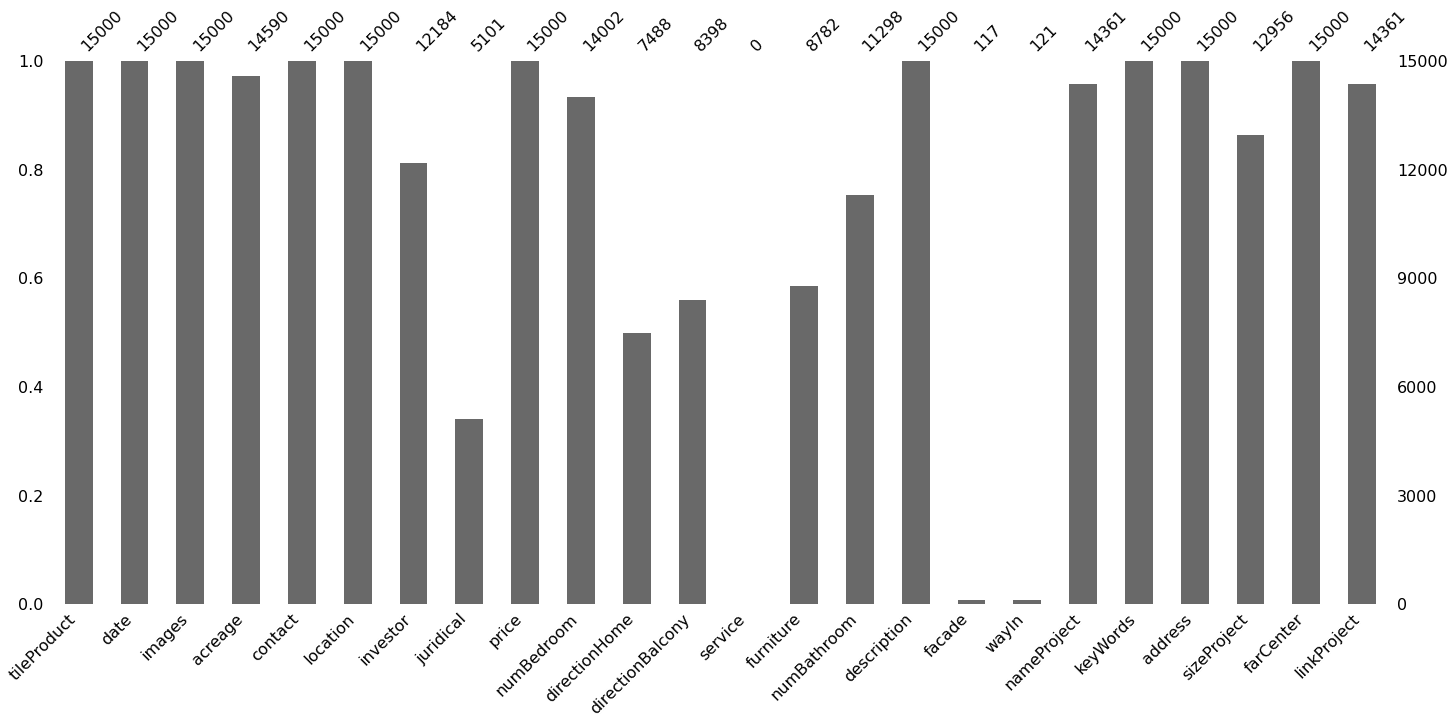

In [8]:
import missingno as msno
msno.bar(chc)

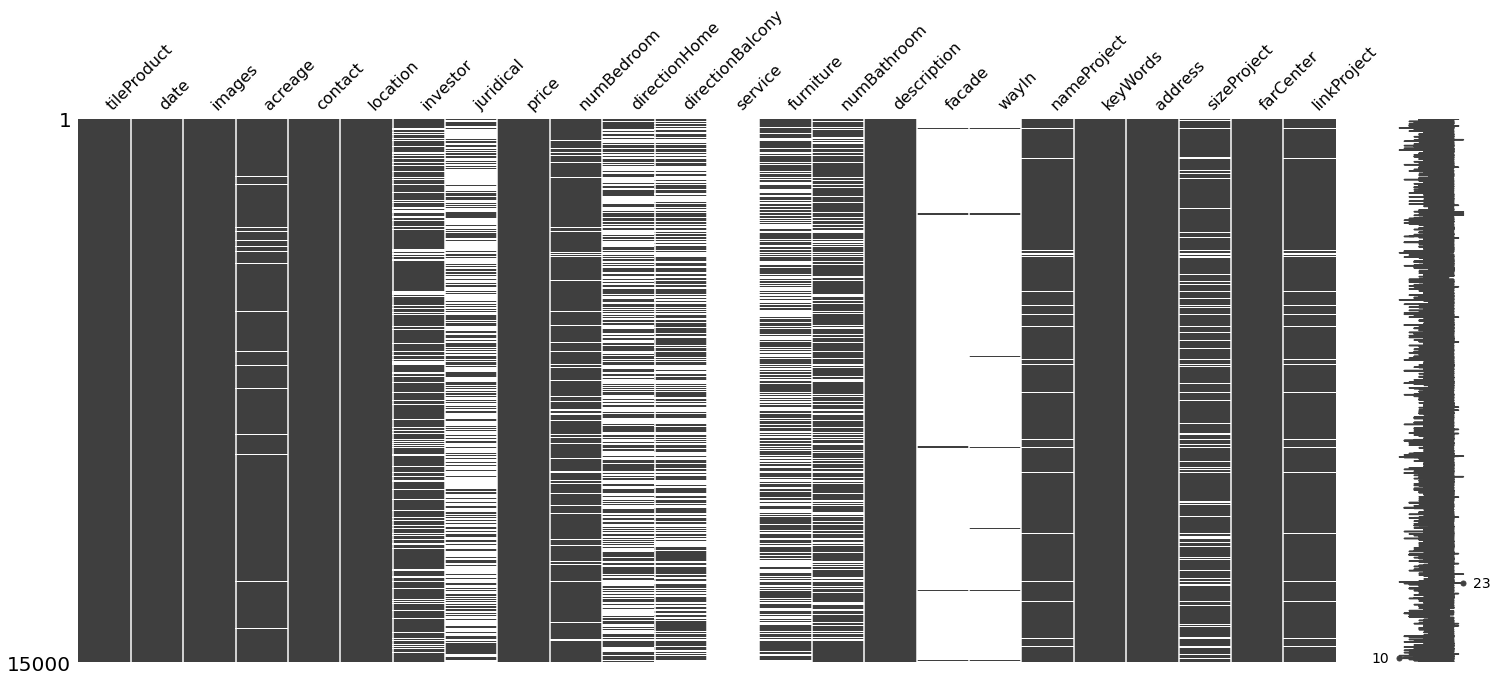

In [9]:
msno.matrix(chc)

#Chuyển dữ liệu sang dạng số

In [10]:
acreage=chc['acreage'].str.extract('(\d+.?\d*)').astype(float)
acreage.isnull().sum()
#bỏ m2 trên acreage chuyển sang dạng số

0    410
dtype: int64

In [11]:
chc['acreage'] = acreage
#thay gia chi ở col acreage bang gia tri mới

In [12]:
typrice = chc['price'].str.contains("tỷ")
#lay gia tri co chu ty ra

In [13]:
trieuprice = chc['price'].str.endswith('iệu')

In [14]:
floattyprice = chc[typrice]['price'].str.extract('(\d+.?\d*)').astype(float)*1000
#Lay tu typrice ra va *1000 de tinh sang trieu

In [15]:
pricetom=floattyprice.div(chc[typrice][['acreage']].values)
#quy tien ty ve tien trieu

In [16]:
chc['pricePerM'] = chc['price'].copy()
#copy ra 1 col moi

In [17]:
chc['pricePerM'] = chc['pricePerM'].str.extract('(\d+.?\d*)').astype(float)
#covert bang ve so

In [18]:
chc['pricePerM'].update(pricetom[0])
#update la bang pricetom bang gia/m

In [19]:
giatrieu=chc[trieuprice&(chc['pricePerM']>200)]['pricePerM']
trieuToM= giatrieu.div(chc[trieuprice&(chc['pricePerM']>200)]['acreage'].values)

In [20]:
chc['pricePerM'].update(trieuToM)

In [21]:
chc[['price','pricePerM']].iloc[75]

price        850 triệu
pricePerM      15.4545
Name: 75, dtype: object

In [22]:
numBathroom = chc['numBathroom'].str.extract('(\d+)').astype(float)
numBedroom = chc['numBedroom'].str.extract('(\d+)').astype(float)

In [23]:
chc['numBathroom'] = numBathroom
chc['numBedroom'] = numBedroom
#Lấy số phòng ngủ, phòng tắm. Sau đó thay vào cột tương ứng

In [24]:
chc['pricePerM'].isnull().sum()

874

In [25]:
locations = chc.location.str.strip('[]').str.split(',')
#Lấy Latitude và Longitude

In [26]:
latitude =  []
longitude = []
for i in locations:
    latitude.append(float(i[0]))
    longitude.append(float(i[1]))


In [27]:
chc['lat']=latitude
chc['long'] = longitude
#Thêm 2 cột Lat, long

In [28]:
chc['date'] = pd.to_datetime(chc['date'],dayfirst=True)

In [29]:
chc['quarters'] = chc['date'].dt.quarter
#Thêm quý trong năm

In [30]:
chc[['price','acreage']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    15000 non-null  object 
 1   acreage  14590 non-null  float64
dtypes: float64(1), object(1)
memory usage: 234.5+ KB


In [34]:
df=chc.drop(columns=['service','facade','wayIn','contact','linkProject','location'])

In [35]:
df[df['pricePerM'].isnull()][['pricePerM','price','acreage']]

,pricePerM,price,acreage
7,NaN,Thỏa thuận,112.5
22,NaN,Thỏa thuận,38.0
52,NaN,Thỏa thuận,NaN
88,NaN,Thỏa thuận,NaN
96,NaN,Thỏa thuận,85.6
...,...,...,...
14970,NaN,Thỏa thuận,75.0
14993,NaN,Thỏa thuận,125.0
14994,NaN,Thỏa thuận,954.3
14997,NaN,Thỏa thuận,NaN


In [36]:
df = df.drop(df[df['pricePerM'].isnull()][['pricePerM','price','acreage']].index)

In [41]:
class xuLy_CoBan():
  def chuThuong(self,cols):
    df[cols] = df[cols].str.lower()
    return df[cols]
  def tachTuDesc(self,cols_tim,chuoi,cols_fix,fill):
    df.update(df[(df[cols_tim].str.contains(chuoi))&(df[cols_fix].isnull())][cols_fix].fillna(fill))
    print('Update NaN của '+cols_fix+' từ '+cols_tim+' với tù tìm kiếm là '+chuoi+' thành công!!!')
  def xulyQH(self,listQuan,listHuyen):
    listQH = listQuan + listHuyen
    df_Quan = []
    df_Huyen = []
    for district in listQH:
        addr = df.address.str.lower().str.contains(district.lower())
        df.loc[addr, 'district'] = district
        if district in listQuan:
            df.loc[addr,'hanhChinh'] = 1 
        else:
            df.loc[addr,'hanhChinh'] = 0
#Tạo class xử lý dữ liệu

In [38]:
QUAN = ['Hoàn Kiếm',
    'Đống Đa',
    'Ba Đình',
    'Hai Bà Trưng',
    'Hoàng Mai',
    'Thanh Xuân',
    'Long Biên',
    'Nam Từ Liêm',
    'Bắc Từ Liêm',
    'Tây Hồ',
    'Cầu Giấy',
    'Hà Đông']
HUYEN = ['Sơn Tây',
    'Ba Vì',
    'Chương Mỹ',
    'Phúc Thọ',
    'Đan Phượng',
    'Đông Anh',
    'Gia Lâm',
    'Hoài Đức',
    'Mê Linh',
    'Mỹ Đức',
    'Phú Xuyên',
    'Quốc Oai',
    'Sóc Sơn',
    'Thạch Thất',
    'Thanh Oai',
    'Thường Tín',
    'Ứng Hòa',
    'Thanh Trì']
    

In [39]:
df.head()

,tileProduct,date,images,acreage,investor,juridical,price,numBedroom,directionHome,directionBalcony,furniture,numBathroom,description,nameProject,keyWords,address,sizeProject,farCenter,pricePerM,lat,long,quarters
0,"BÁN CĂN HỘ CCCC 3PN, 2WC TẠI DỰ ÁN MỸ ĐÌNH PEARL",2020-10-02,['https://file4.batdongsan.com.vn/resize/200x2...,94.0,Công ty CP tập đoàn S.S.G,Đã nhận bàn giao và có sổ đỏ.,30 triệu/m²,3.0,NaN,NaN,Đầy đủ nội thất gắn cố định căn hộ đã nhận bàn...,2.0,Tôi chính chủ cần bán căn hộ CCCC tại dự án Mỹ...,Mỹ Đình Pearl,"['Bán chung cư Mỹ Đình Pearl', 'Bán chung cư M...","Phường Phú Đô, Nam Từ Liêm, Hà Nội","Gồm khách sạn, văn phòng, căn hộ",9.030936,30.000000,21.012432,105.767395,4
1,TỔNG HỢP 8 CĂN ĐẸP - GIÁ TỐT NHẤT THÁNG 10; QU...,2020-10-01,['https://file4.batdongsan.com.vn/resize/200x2...,72.0,Tập đoàn Vingroup,Đầy đủ,2.8 tỷ,2.0,Đông-Nam,Đông-Nam,Full,2.0,Hotline: 0911 658 666.Chính sách ưu đãi khủng ...,Vinhomes West Point,['Bán chung cư Vinhomes West Point Nam Từ Liêm...,"Đường Phạm Hùng, phường Mễ Trì, quận Nam Từ Li...",3 tòa tháp cao tầng và trung tâm thương mại,7.527950,38.888889,21.019798,105.780708,4
2,BÁN CĂN HỘ D'CAPITALE TRẦN DUY HƯNG - VIEW ĐẸP...,2020-10-01,['https://file4.batdongsan.com.vn/resize/200x2...,82.0,Tân Hoàng Minh Group,Đã có sổ hồng,2.8 tỷ,2.0,Tây-Bắc,Đông-Nam,Bàn giao căn hộ thô Bàn giao căn hộ Bán hoàn t...,2.0,Bán chung cư D'capitale - Trần Duy Hưng - Nhận...,Vinhomes D'Capitale,"[""Bán chung cư Vinhomes D'Capitale"", ""Bán chun...","Đường Trần Duy Hưng, Phường Trung Hòa, Cầu Giấ...",Gồm 4 tòa căn hộ và 2 tòa văn phòng,6.563944,34.146341,21.005806,105.794373,4
3,VINHOMES SMART CITY -CĂN GÓC 2PN -GIÁ GỐC CĐT-...,2020-09-30,['https://i1.ytimg.com/vi/ItgMATHUuOk/default....,69.0,Tập đoàn Vingroup,Sổ lâu dài,29 triệu/m²,2.0,Tây-Bắc,Đông-Nam,Bàn giao đầy đủ nội thất gồm: - Trần thạch cao...,2.0,"Căn góc 2 phòng ngủ, 2 WC ban công Đông Nam má...",Vinhomes Smart City Đại Mỗ,"['Bán chung cư Vinhomes Smart City Đại Mỗ', 'B...","Phường Đại Mỗ, Nam Từ Liêm, Hà Nội",58 tòa chung cư cao 30-38 tầng,10.578458,29.000000,21.006529,105.753555,3
4,HÓT CĂN GÓC 4PN CHỈ VỚI 5.3TỶ/148M2 UDIC WESTL...,2020-09-30,['https://file4.batdongsan.com.vn/2020/09/30/2...,148.0,Tổng công ty Đầu tư Phát triển Hạ tầng đô thị ...,NaN,5.3 tỷ,4.0,Đông-Nam,Tây-Bắc,Full nội thất liền tường.,2.0,Bán căn 4PN Chung cư cao cấp UDIC Westlake nằm...,Udic Westlake,"['Bán chung cư Udic Westlake', 'Bán chung cư U...","Đường Võ Chí Công, phường Phú Thượng, Tây Hồ, ...","Gồm 50 tòa tháp cao 17, 20, 23 tầng, 2500 biệt...",6.251858,35.810811,21.063967,105.805504,3


In [42]:
xuly = xuLy_CoBan()

In [44]:
xuly.chuThuong("investor")
xuly.chuThuong("juridical")
xuly.chuThuong("directionHome")
xuly.chuThuong("directionBalcony")
xuly.chuThuong("furniture")
xuly.chuThuong("description")
xuly.chuThuong("address")
xuly.xulyQH(QUAN,HUYEN)
df.head()

,tileProduct,date,images,acreage,investor,juridical,price,numBedroom,directionHome,directionBalcony,furniture,numBathroom,description,nameProject,keyWords,address,sizeProject,farCenter,pricePerM,lat,long,quarters,district,hanhChinh
0,"BÁN CĂN HỘ CCCC 3PN, 2WC TẠI DỰ ÁN MỸ ĐÌNH PEARL",2020-10-02,['https://file4.batdongsan.com.vn/resize/200x2...,94.0,công ty cp tập đoàn s.s.g,đã nhận bàn giao và có sổ đỏ.,30 triệu/m²,3.0,NaN,NaN,đầy đủ nội thất gắn cố định căn hộ đã nhận bàn...,2.0,tôi chính chủ cần bán căn hộ cccc tại dự án mỹ...,Mỹ Đình Pearl,"['Bán chung cư Mỹ Đình Pearl', 'Bán chung cư M...","phường phú đô, nam từ liêm, hà nội","Gồm khách sạn, văn phòng, căn hộ",9.030936,30.000000,21.012432,105.767395,4,Nam Từ Liêm,1.0
1,TỔNG HỢP 8 CĂN ĐẸP - GIÁ TỐT NHẤT THÁNG 10; QU...,2020-10-01,['https://file4.batdongsan.com.vn/resize/200x2...,72.0,tập đoàn vingroup,đầy đủ,2.8 tỷ,2.0,đông-nam,đông-nam,full,2.0,hotline: 0911 658 666.chính sách ưu đãi khủng ...,Vinhomes West Point,['Bán chung cư Vinhomes West Point Nam Từ Liêm...,"đường phạm hùng, phường mễ trì, quận nam từ li...",3 tòa tháp cao tầng và trung tâm thương mại,7.527950,38.888889,21.019798,105.780708,4,Nam Từ Liêm,1.0
2,BÁN CĂN HỘ D'CAPITALE TRẦN DUY HƯNG - VIEW ĐẸP...,2020-10-01,['https://file4.batdongsan.com.vn/resize/200x2...,82.0,tân hoàng minh group,đã có sổ hồng,2.8 tỷ,2.0,tây-bắc,đông-nam,bàn giao căn hộ thô bàn giao căn hộ bán hoàn t...,2.0,bán chung cư d'capitale - trần duy hưng - nhận...,Vinhomes D'Capitale,"[""Bán chung cư Vinhomes D'Capitale"", ""Bán chun...","đường trần duy hưng, phường trung hòa, cầu giấ...",Gồm 4 tòa căn hộ và 2 tòa văn phòng,6.563944,34.146341,21.005806,105.794373,4,Cầu Giấy,1.0
3,VINHOMES SMART CITY -CĂN GÓC 2PN -GIÁ GỐC CĐT-...,2020-09-30,['https://i1.ytimg.com/vi/ItgMATHUuOk/default....,69.0,tập đoàn vingroup,sổ lâu dài,29 triệu/m²,2.0,tây-bắc,đông-nam,bàn giao đầy đủ nội thất gồm: - trần thạch cao...,2.0,"căn góc 2 phòng ngủ, 2 wc ban công đông nam má...",Vinhomes Smart City Đại Mỗ,"['Bán chung cư Vinhomes Smart City Đại Mỗ', 'B...","phường đại mỗ, nam từ liêm, hà nội",58 tòa chung cư cao 30-38 tầng,10.578458,29.000000,21.006529,105.753555,3,Nam Từ Liêm,1.0
4,HÓT CĂN GÓC 4PN CHỈ VỚI 5.3TỶ/148M2 UDIC WESTL...,2020-09-30,['https://file4.batdongsan.com.vn/2020/09/30/2...,148.0,tổng công ty đầu tư phát triển hạ tầng đô thị ...,NaN,5.3 tỷ,4.0,đông-nam,tây-bắc,full nội thất liền tường.,2.0,bán căn 4pn chung cư cao cấp udic westlake nằm...,Udic Westlake,"['Bán chung cư Udic Westlake', 'Bán chung cư U...","đường võ chí công, phường phú thượng, tây hồ, ...","Gồm 50 tòa tháp cao 17, 20, 23 tầng, 2500 biệt...",6.251858,35.810811,21.063967,105.805504,3,Tây Hồ,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


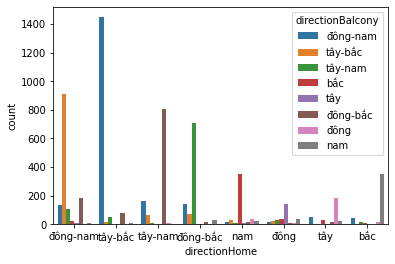

In [46]:
sns.countplot(df['directionHome'], hue=df['directionBalcony'])

In [49]:
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('đông-nam', na=False))]['directionHome'].fillna('tây-bắc'))
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('tây-bắc', na=False))]['directionHome'].fillna('đông-nam'))
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('tây-nam', na=False))]['directionHome'].fillna('đông-bắc'))
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('đông-bắc', na=False))]['directionHome'].fillna('tây-nam'))
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('nam', na=False))]['directionHome'].fillna('bắc'))
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('đông', na=False))]['directionHome'].fillna('tây'))
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('tây', na=False))]['directionHome'].fillna('đông'))
df.update(df[(df['directionHome'].isnull())&(df['directionBalcony'].str.contains('bắc', na=False))]['directionHome'].fillna('nam'))


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


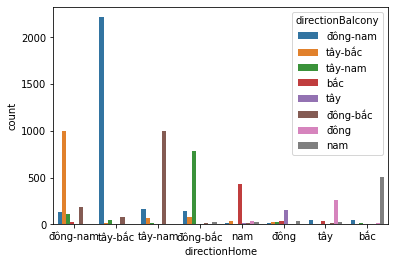

In [50]:
sns.countplot(df['directionHome'], hue=df['directionBalcony'])

In [51]:
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('tây-bắc', na=False))]['directionBalcony'].fillna('đông-nam'))
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('đông-nam', na=False))]['directionBalcony'].fillna('tây-bắc'))
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('tây-nam', na=False))]['directionBalcony'].fillna('đông-bắc'))
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('bắc', na=False))]['directionBalcony'].fillna('nam'))
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('tây', na=False))]['directionBalcony'].fillna('đông'))
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('đông-bắc', na=False))]['directionBalcony'].fillna('tây-nam'))
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('đông', na=False))]['directionBalcony'].fillna('tây'))
df.update(df[(df['directionBalcony'].isnull())&(df['directionHome'].str.contains('nam', na=False))]['directionBalcony'].fillna('bắc'))


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


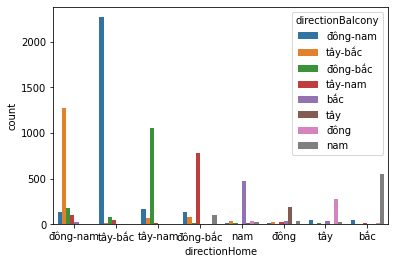

In [53]:
sns.countplot(df['directionHome'], hue=df['directionBalcony'])

In [54]:
df.head()

,tileProduct,date,images,acreage,investor,juridical,price,numBedroom,directionHome,directionBalcony,furniture,numBathroom,description,nameProject,keyWords,address,sizeProject,farCenter,pricePerM,lat,long,quarters,district,hanhChinh
0,"BÁN CĂN HỘ CCCC 3PN, 2WC TẠI DỰ ÁN MỸ ĐÌNH PEARL",2020-10-02,['https://file4.batdongsan.com.vn/resize/200x2...,94.0,công ty cp tập đoàn s.s.g,đã nhận bàn giao và có sổ đỏ.,30 triệu/m²,3.0,NaN,NaN,đầy đủ nội thất gắn cố định căn hộ đã nhận bàn...,2.0,tôi chính chủ cần bán căn hộ cccc tại dự án mỹ...,Mỹ Đình Pearl,"['Bán chung cư Mỹ Đình Pearl', 'Bán chung cư M...","phường phú đô, nam từ liêm, hà nội","Gồm khách sạn, văn phòng, căn hộ",9.030936,30.000000,21.012432,105.767395,4,Nam Từ Liêm,1.0
1,TỔNG HỢP 8 CĂN ĐẸP - GIÁ TỐT NHẤT THÁNG 10; QU...,2020-10-01,['https://file4.batdongsan.com.vn/resize/200x2...,72.0,tập đoàn vingroup,đầy đủ,2.8 tỷ,2.0,đông-nam,đông-nam,full,2.0,hotline: 0911 658 666.chính sách ưu đãi khủng ...,Vinhomes West Point,['Bán chung cư Vinhomes West Point Nam Từ Liêm...,"đường phạm hùng, phường mễ trì, quận nam từ li...",3 tòa tháp cao tầng và trung tâm thương mại,7.527950,38.888889,21.019798,105.780708,4,Nam Từ Liêm,1.0
2,BÁN CĂN HỘ D'CAPITALE TRẦN DUY HƯNG - VIEW ĐẸP...,2020-10-01,['https://file4.batdongsan.com.vn/resize/200x2...,82.0,tân hoàng minh group,đã có sổ hồng,2.8 tỷ,2.0,tây-bắc,đông-nam,bàn giao căn hộ thô bàn giao căn hộ bán hoàn t...,2.0,bán chung cư d'capitale - trần duy hưng - nhận...,Vinhomes D'Capitale,"[""Bán chung cư Vinhomes D'Capitale"", ""Bán chun...","đường trần duy hưng, phường trung hòa, cầu giấ...",Gồm 4 tòa căn hộ và 2 tòa văn phòng,6.563944,34.146341,21.005806,105.794373,4,Cầu Giấy,1.0
3,VINHOMES SMART CITY -CĂN GÓC 2PN -GIÁ GỐC CĐT-...,2020-09-30,['https://i1.ytimg.com/vi/ItgMATHUuOk/default....,69.0,tập đoàn vingroup,sổ lâu dài,29 triệu/m²,2.0,tây-bắc,đông-nam,bàn giao đầy đủ nội thất gồm: - trần thạch cao...,2.0,"căn góc 2 phòng ngủ, 2 wc ban công đông nam má...",Vinhomes Smart City Đại Mỗ,"['Bán chung cư Vinhomes Smart City Đại Mỗ', 'B...","phường đại mỗ, nam từ liêm, hà nội",58 tòa chung cư cao 30-38 tầng,10.578458,29.000000,21.006529,105.753555,3,Nam Từ Liêm,1.0
4,HÓT CĂN GÓC 4PN CHỈ VỚI 5.3TỶ/148M2 UDIC WESTL...,2020-09-30,['https://file4.batdongsan.com.vn/2020/09/30/2...,148.0,tổng công ty đầu tư phát triển hạ tầng đô thị ...,NaN,5.3 tỷ,4.0,đông-nam,tây-bắc,full nội thất liền tường.,2.0,bán căn 4pn chung cư cao cấp udic westlake nằm...,Udic Westlake,"['Bán chung cư Udic Westlake', 'Bán chung cư U...","đường võ chí công, phường phú thượng, tây hồ, ...","Gồm 50 tòa tháp cao 17, 20, 23 tầng, 2500 biệt...",6.251858,35.810811,21.063967,105.805504,3,Tây Hồ,1.0


In [58]:
df = df.drop(columns=['tileProduct','juridical','nameProject','keyWords','sizeProject'])

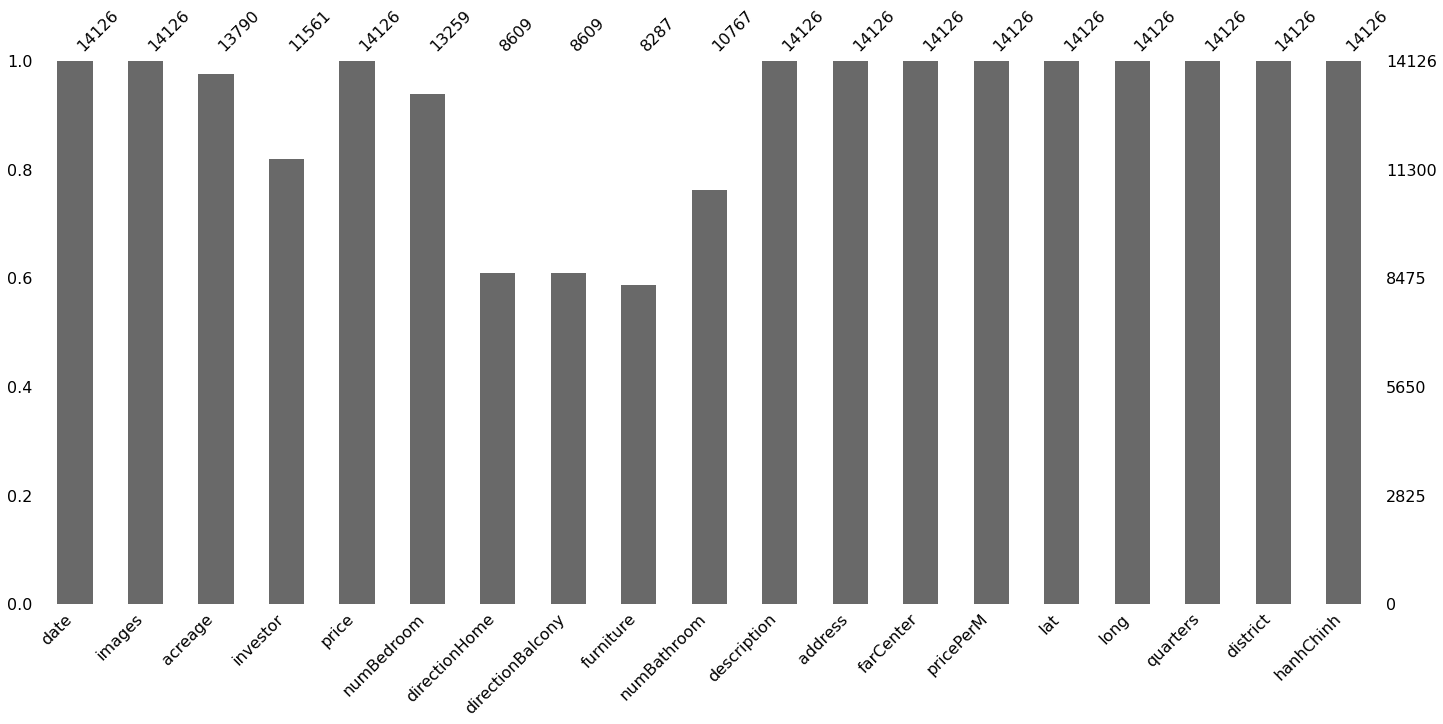

In [59]:
msno.bar(df)


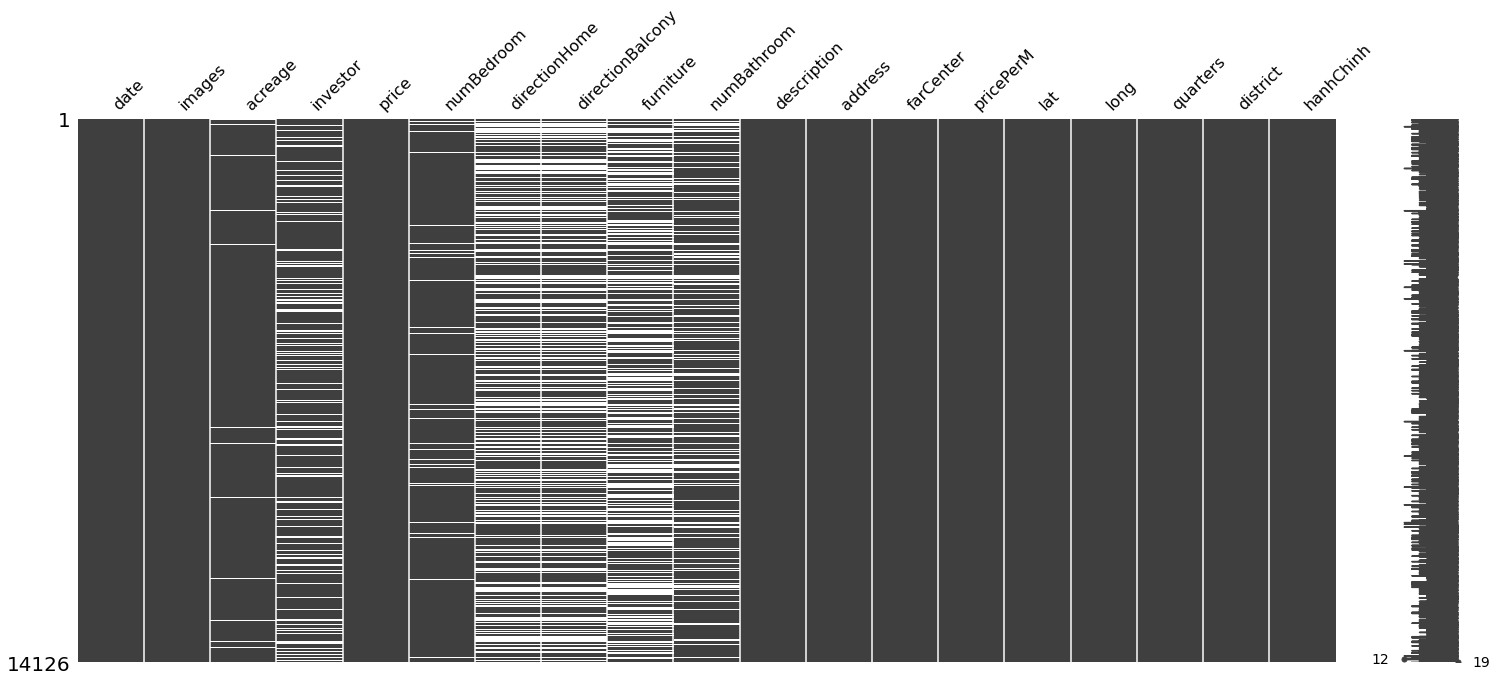

In [60]:
msno.matrix(df)


(13.0, 0.0)

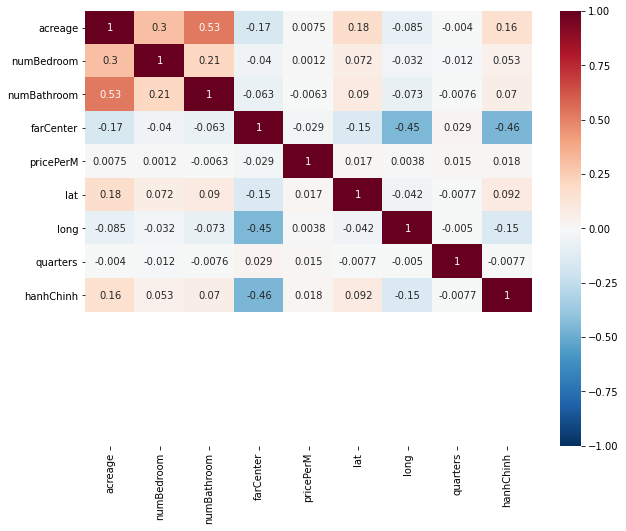

In [61]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(),cmap='RdBu_r', annot=True, vmin = -1, vmax=1)
ax.set_ylim(13,0)

In [120]:
df.update(df[df['acreage'] <= 60]['numBedroom'].fillna(1))
df.update(df[df['acreage'] <= 85]['numBedroom'].fillna(2))
df.update(df[df['acreage'] <= 126]['numBedroom'].fillna(3))
df.update(df[df['acreage'] <= 250]['numBedroom'].fillna(4))
df.update(df[df['acreage'] > 250]['numBedroom'].fillna(4))


df.update(df[(df.numBathroom == 1) & (df.numBedroom.isnull())]['numBedroom'].fillna(1))
df.update(df[(df.numBedroom == 1) & (df.numBathroom.isnull())]['numBathroom'].fillna(1))
df.update(df[(df.numBathroom == 2) & (df.numBedroom.isnull())]['numBedroom'].fillna(2))
df.update(df[(df.numBedroom == 2) & (df.numBathroom.isnull()) & (df.pricePerM < 30) & (df.acreage < 64)]['numBathroom'].fillna(1))
df.update(df[(df.numBedroom == 2) & (df.numBathroom.isnull())]['numBathroom'].fillna(2))
df.update(df[(df.numBedroom == 3) & (df.numBathroom.isnull()) & (df.pricePerM < 67) & (df.acreage < 175)]['numBathroom'].fillna(3))
df.update(df[(df.numBathroom == 3) & (df.numBedroom.isnull())]['numBedroom'].fillna(4))
df.update(df[(df.numBathroom == 4) & (df.numBedroom.isnull())]['numBedroom'].fillna(4))
df.update(df[(df.numBedroom == 4) & (df.numBathroom.isnull())]['numBathroom'].fillna(4))
df.update(df[(df.numBedroom == 3) & (df.numBathroom.isnull())]['numBathroom'].fillna(3))
df.update(df[(df.numBedroom == 5) & (df.numBathroom.isnull())]['numBathroom'].fillna(4))


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14126 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              14126 non-null  datetime64[ns]
 1   images            14126 non-null  object        
 2   acreage           13790 non-null  float64       
 3   investor          11561 non-null  object        
 4   price             14126 non-null  object        
 5   numBedroom        14035 non-null  float64       
 6   directionHome     8609 non-null   object        
 7   directionBalcony  8609 non-null   object        
 8   furniture         8287 non-null   object        
 9   numBathroom       13732 non-null  float64       
 10  description       14126 non-null  object        
 11  address           14126 non-null  object        
 12  farCenter         14126 non-null  float64       
 13  pricePerM         14126 non-null  float64       
 14  lat               1412

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


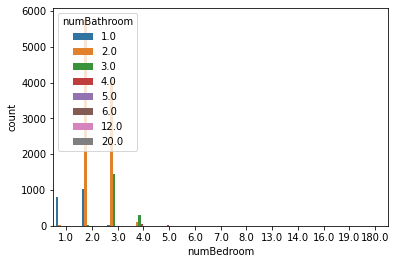

In [108]:
sns.countplot(df['numBedroom'], hue=df['numBathroom'])

In [123]:
df = df.drop(df[df['acreage'].isnull()].index)
df = df.reset_index().drop(columns=['index'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13790 entries, 0 to 13789
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              13790 non-null  datetime64[ns]
 1   images            13790 non-null  object        
 2   acreage           13790 non-null  float64       
 3   investor          11290 non-null  object        
 4   price             13790 non-null  object        
 5   numBedroom        13790 non-null  float64       
 6   directionHome     8523 non-null   object        
 7   directionBalcony  8523 non-null   object        
 8   furniture         8133 non-null   object        
 9   numBathroom       13789 non-null  float64       
 10  description       13790 non-null  object        
 11  address           13790 non-null  object        
 12  farCenter         13790 non-null  float64       
 13  pricePerM         13790 non-null  float64       
 14  lat               1379

In [ ]:
df = df.reset_index().drop(columns=['index'])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13789 entries, 0 to 13788
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              13789 non-null  datetime64[ns]
 1   images            13789 non-null  object        
 2   acreage           13789 non-null  float64       
 3   investor          11290 non-null  object        
 4   price             13789 non-null  object        
 5   numBedroom        13789 non-null  float64       
 6   directionHome     8523 non-null   object        
 7   directionBalcony  8523 non-null   object        
 8   furniture         8133 non-null   object        
 9   numBathroom       13789 non-null  float64       
 10  description       13789 non-null  object        
 11  address           13789 non-null  object        
 12  farCenter         13789 non-null  float64       
 13  pricePerM         13789 non-null  float64       
 14  lat               1378

In [ ]:
#Dùng hàm tachTuDesc trong class xuLy_CoBan để phân nội thất thành cao cấp, full, cơ bản, chưa có, và xử lý 1 vài trường khác bằng thủ công

In [ ]:
#Sau đó điền vào các ô còn null khác là Missing
data.update(data.fillna('Missing'))
#Dữ liệu sau đó được lưu vào file tên dataPxK_full.csv

In [164]:
data = pd.read_csv(path+'dataPxK_full.csv', lineterminator='\n')
#Lấy dữ liệu đã xử lý ra

In [165]:
data= data.drop(columns=['huyen']).rename(columns={'quan':'hanhChinh'})

In [166]:
data.head()

,date,investor,acreage,pricePerM,price,numBedroom,numBathroom,furniture,directionHome,directionBalcony,district,hanhChinh,farCenter,lat,long,quarters,images,address
0,2020-10-02,công ty cp tập đoàn s.s.g,94.0,30.000000,30 triệu/m²,3.0,2.0,full,Missing,Missing,Nam Từ Liêm,1,9.030936,21.012432,105.767395,4,['https://file4.batdongsan.com.vn/resize/200x2...,"phường phú đô, nam từ liêm, hà nội"
1,2020-10-01,tập đoàn vingroup,72.0,38.888889,2.8 tỷ,2.0,2.0,full,đông-nam,đông-nam,Nam Từ Liêm,1,7.527950,21.019798,105.780708,4,['https://file4.batdongsan.com.vn/resize/200x2...,"đường phạm hùng, phường mễ trì, quận nam từ li..."
2,2020-10-01,tân hoàng minh group,82.0,34.146341,2.8 tỷ,2.0,2.0,cao cấp,tây-bắc,đông-nam,Cầu Giấy,1,6.563944,21.005806,105.794373,4,['https://file4.batdongsan.com.vn/resize/200x2...,"đường trần duy hưng, phường trung hòa, cầu giấ..."
3,2020-09-30,tập đoàn vingroup,69.0,29.000000,29 triệu/m²,2.0,2.0,full,tây-bắc,đông-nam,Nam Từ Liêm,1,10.578458,21.006529,105.753555,3,['https://i1.ytimg.com/vi/ItgMATHUuOk/default....,"phường đại mỗ, nam từ liêm, hà nội"
4,2020-09-30,tổng công ty đầu tư phát triển hạ tầng đô thị ...,148.0,35.810811,5.3 tỷ,4.0,2.0,full,đông-nam,tây-bắc,Tây Hồ,1,6.251858,21.063967,105.805504,3,['https://file4.batdongsan.com.vn/2020/09/30/2...,"đường võ chí công, phường phú thượng, tây hồ, ..."


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13735 entries, 0 to 13734
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              13735 non-null  object 
 1   investor          13735 non-null  object 
 2   acreage           13735 non-null  float64
 3   pricePerM         13735 non-null  float64
 4   price             13735 non-null  object 
 5   numBedroom        13735 non-null  float64
 6   numBathroom       13735 non-null  float64
 7   furniture         13735 non-null  object 
 8   directionHome     13735 non-null  object 
 9   directionBalcony  13735 non-null  object 
 10  district          13735 non-null  object 
 11  hanhChinh         13735 non-null  int64  
 12  farCenter         13735 non-null  float64
 13  lat               13735 non-null  float64
 14  long              13735 non-null  float64
 15  quarters          13735 non-null  int64  
 16  images            13735 non-null  object

(13.0, 0.0)

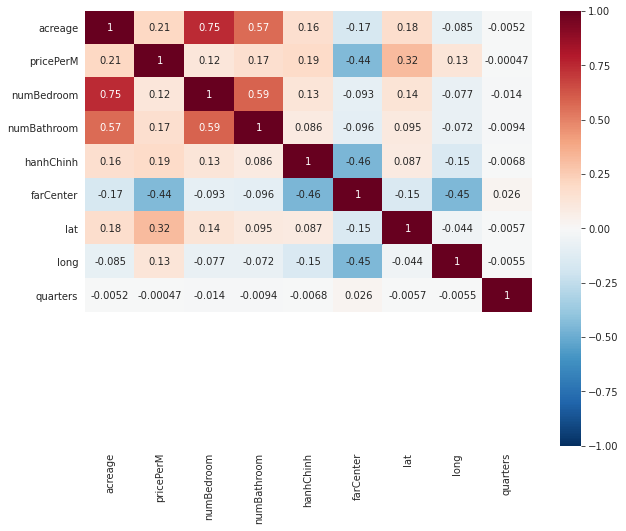

In [168]:
plt.figure(figsize=(10,8))
ax=sns.heatmap(data.corr(), cmap='RdBu_r',annot=True, vmin=-1, vmax=1)
ax.set_ylim(13,0)

Hệ số tương quan của acreage, numBedroom, numBathroom, hanhChinh, farCenter, lat, long và quarters lần lượt là: 0.21, 0.12, 0.17, 0.19, -0.44, 0.32, 0.13 và -0.00047
Có thể kết luận farCenter và quarters có mối tương quan nghịch với PricePerM, còn cái feature khác thì tương quan thuận

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



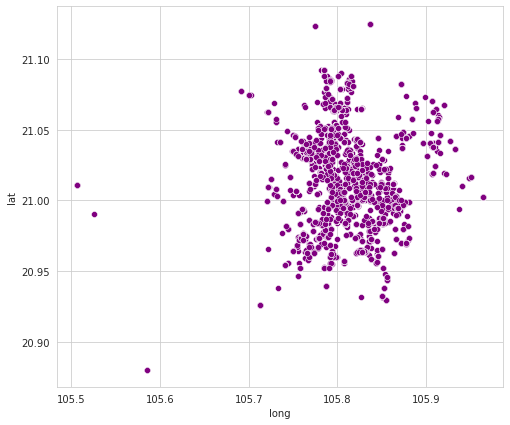

In [169]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,7))
sns.scatterplot('long', 'lat', data=data, color='purple')

Có thể thấy dữ liệu nhà tập trung chủ yếu ở long: 105.7 -> 105.9 và lat: 20.95 -> 21.09

In [145]:
import plotly.express as px
px.scatter_3d(data, x='long', y='lat', z='pricePerM', color='pricePerM')

##Outliers

In [146]:
data.describe()

,acreage,pricePerM,numBedroom,numBathroom,hanhChinh,farCenter,lat,long,quarters
count,13735.000000,13735.000000,13735.000000,13735.000000,13735.000000,13735.000000,13735.000000,13735.000000,13735.000000
mean,91.412310,29.162788,2.467419,1.982672,0.923990,7.206103,21.012550,105.810348,3.298580
std,34.670946,12.515721,0.680137,0.473245,0.265024,2.699629,0.034129,0.045439,0.457652
min,17.000000,6.470588,1.000000,1.000000,0.000000,0.008608,20.880546,105.506409,3.000000
25%,69.000000,22.000000,2.000000,2.000000,1.000000,5.712793,20.990183,105.782280,3.000000
50%,85.000000,26.500000,2.000000,2.000000,1.000000,6.866052,21.006311,105.802612,3.000000
75%,108.000000,33.000000,3.000000,2.000000,1.000000,8.869522,21.036568,105.827049,4.000000
max,481.000000,280.000000,19.000000,20.000000,1.000000,36.018623,21.125017,105.964111,4.000000


In [170]:
def box_dist_plot(Feature):
    f, (ax_box, ax_dist) = plt.subplots(2, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(Feature, data=data, color='blue', ax=ax_box)
    sns.distplot(data[Feature],hist=True, kde=False, color='blue', ax=ax_dist)
    ax_dist.set_ylabel('Counts')
    ax_box.set_xlabel('')
    Q1 = data[Feature].quantile(0.25)
    Q3 = data[Feature].quantile(0.75)
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    print('Lower Whisker:',Lower_Whisker, 'Upper Whisker:',Upper_Whisker)

In [148]:
# OUtliear Remover Function
def OutlierRemover(Feature):
    global data
    Q1 = data[Feature].quantile(0.25)
    Q3 = data[Feature].quantile(0.75)
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    data = data[(data[Feature]>Lower_Whisker)&(data[Feature]<Upper_Whisker)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Lower Whisker: 5.5 Upper Whisker: 49.5


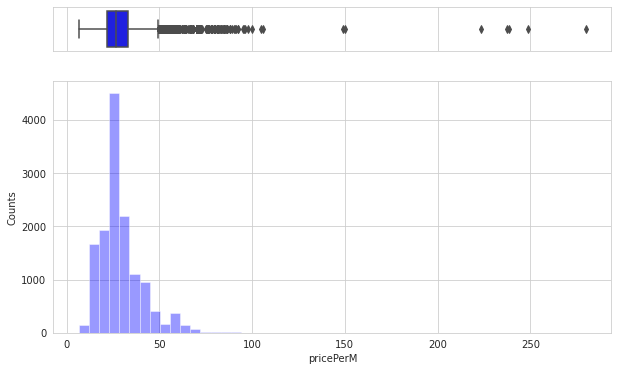

In [171]:
box_dist_plot('pricePerM')

Khoảng giá chấp nhận được là từ 5.5 -> 49.5

#Bath room, Bed room

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Lower Whisker: 0.5 Upper Whisker: 4.5


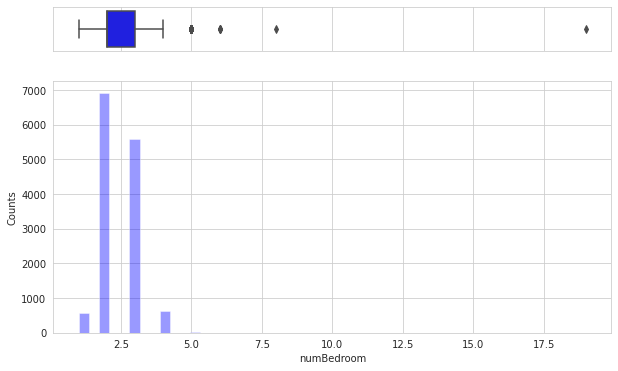

In [172]:
box_dist_plot('numBedroom')

Phòng ngủ thì 0.5 -> 4.5

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Lower Whisker: 2.0 Upper Whisker: 2.0


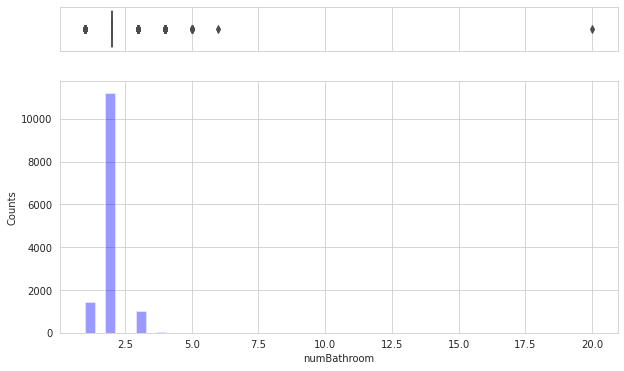

In [173]:
box_dist_plot('numBathroom')

Phòng tắm: 2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Lower Whisker: 10.5 Upper Whisker: 166.5


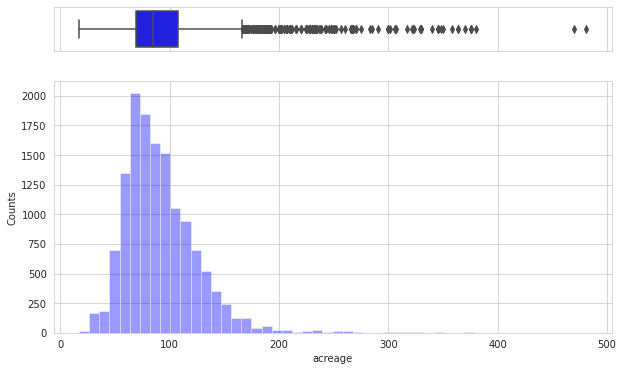

In [174]:
box_dist_plot('acreage')

Diện tích: 10.5m2 -> 166.5m2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

Text(0, 0.5, '')

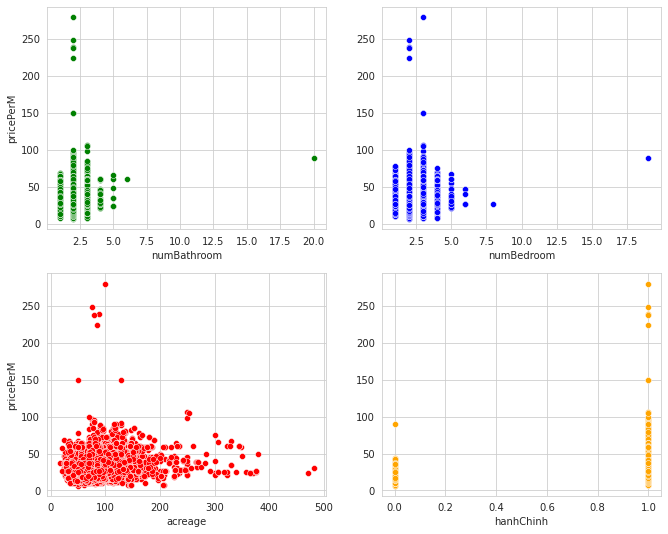

In [175]:
f,ax = plt.subplots(2,2,figsize=(11,9))

sns.scatterplot('numBathroom', 'pricePerM', data=data, color='g', ax=ax[0,0])
sns.scatterplot('numBedroom', 'pricePerM', data=data, color='b', ax=ax[0,1])
sns.scatterplot('acreage', 'pricePerM', data=data, color='r', ax=ax[1,0])
sns.scatterplot('hanhChinh', 'pricePerM', data=data, color='orange', ax=ax[1,1])

ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Nam Từ Liêm     1770
Thanh Xuân      1740
Hà Đông         1533
Cầu Giấy        1489
Bắc Từ Liêm     1408
Hoàng Mai       1322
Hai Bà Trưng     992
Tây Hồ           980
Long Biên        715
Đống Đa          420
Thanh Trì        330
Gia Lâm          313
Ba Đình          302
Hoài Đức         257
Đông Anh          74
Thanh Oai         22
Chương Mỹ         22
Hoàn Kiếm         20
Đan Phượng        18
Thạch Thất         8
Name: district, dtype: int64

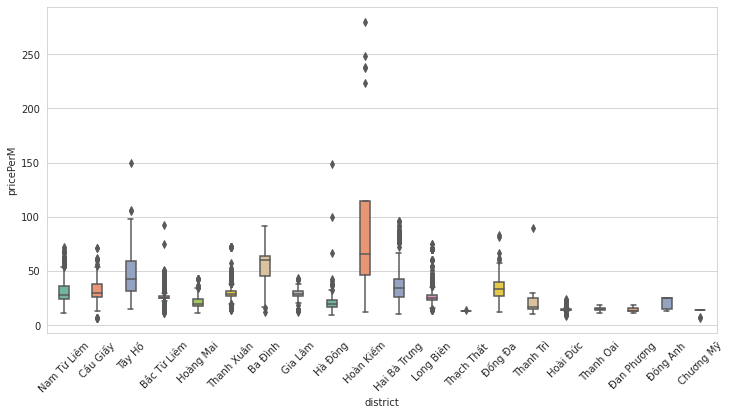

In [179]:
plt.figure(figsize=(12,6))
sns.boxplot('district', 'pricePerM', data=data, width=0.3, palette="Set2")
plt.xticks(rotation=45)

data['district'].value_counts()

Trong bộ dữ liệu: nhà ở các quận nội thành Hà Nội có nhiều dữ liệu nhất, như là: Nam Từ Liêm, Thanh Xuân, Hà Đông, Cầu Giấy,...

Giá nhà tại Hoàn Kiếm, Ba Đình đang là 2 khu vực giá cao nhất

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



full       6588
cơ bản     3681
cao cấp    2852
chưa có     614
Name: furniture, dtype: int64

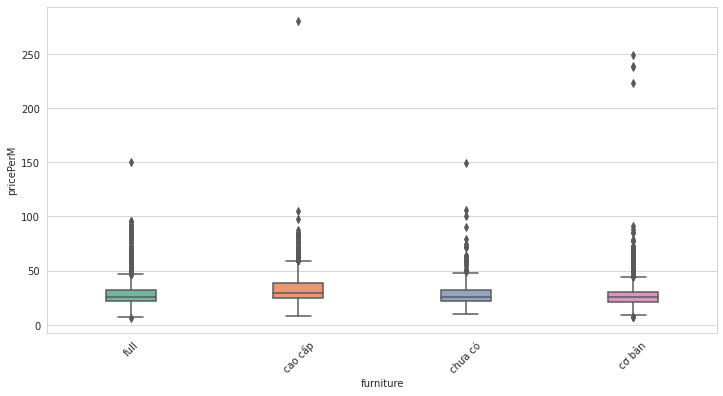

In [180]:
plt.figure(figsize=(12,6))
sns.boxplot('furniture', 'pricePerM', data=data, width=0.3, palette="Set2")
plt.xticks(rotation=45)

data['furniture'].value_counts()

Trong bộ dữ liệu, nội thất đa số là đã đầy đủ

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Missing     5233
tây-bắc     2381
đông-nam    1722
tây-nam     1304
đông-bắc    1112
bắc          643
nam          616
tây          389
đông         335
Name: directionHome, dtype: int64

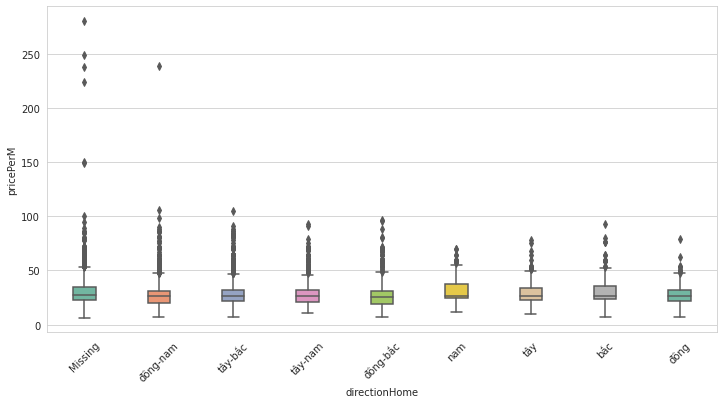

In [181]:
plt.figure(figsize=(12,6))
sns.boxplot('directionHome', 'pricePerM', data=data, width=0.3, palette="Set2")
plt.xticks(rotation=45)

data['directionHome'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Missing     5233
đông-nam    2787
tây-bắc     1480
đông-bắc    1368
tây-nam      987
nam          745
bắc          573
đông         348
tây          214
Name: directionBalcony, dtype: int64

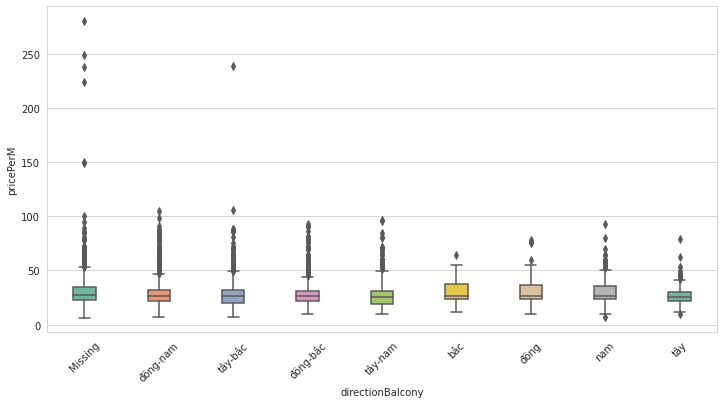

In [182]:
plt.figure(figsize=(12,6))
sns.boxplot('directionBalcony', 'pricePerM', data=data, width=0.3, palette="Set2")
plt.xticks(rotation=45)

data['directionBalcony'].value_counts()

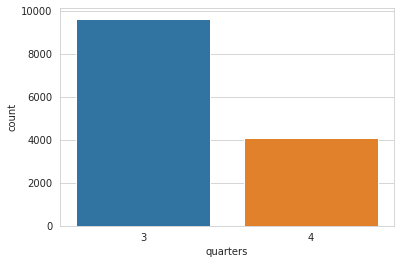

In [183]:
sns.countplot(x= data['quarters'])

In [184]:
data_model = data.drop(columns=['date','price','images','address'])

In [187]:
district_enc = data_model.groupby('district')['farCenter'].mean().to_dict()
district_long = data_model.groupby('district')['long'].mean().to_dict()
district_lat = data_model.groupby('district')['lat'].mean().to_dict()
direction_dict = {'Missing':0,'đông':1,'tây':2,'nam':3,'bắc':4, 'đông-bắc':5, 'tây-nam':6, 'đông-nam':7, 'tây-bắc':8}
furniture_dict = {'chưa có':0,'cơ bản':1, 'full':2, 'cao cấp':3}
investor_dict = data_model.investor.value_counts().to_dict()

In [188]:
data_model = data_model.replace({'district':district_enc})
data_model = data_model.replace({'directionHome':direction_dict,'directionBalcony':direction_dict})
data_model = data_model.replace({'furniture':furniture_dict})
data_model = data_model.replace({'investor':investor_dict})

In [189]:
data_model.head()

,investor,acreage,pricePerM,numBedroom,numBathroom,furniture,directionHome,directionBalcony,district,hanhChinh,farCenter,lat,long,quarters
0,44,94.0,30.000000,3.0,2.0,2,0,0,8.623250,1,9.030936,21.012432,105.767395,4
1,1641,72.0,38.888889,2.0,2.0,2,7,7,8.623250,1,7.527950,21.019798,105.780708,4
2,401,82.0,34.146341,2.0,2.0,3,8,7,6.394736,1,6.563944,21.005806,105.794373,4
3,1641,69.0,29.000000,2.0,2.0,2,8,7,8.623250,1,10.578458,21.006529,105.753555,3
4,185,148.0,35.810811,4.0,2.0,2,7,8,5.611256,1,6.251858,21.063967,105.805504,3


##**Predictive Modeling**


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [197]:
X=data_model.drop('pricePerM', axis=1)
y=data_model['pricePerM']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=0)

In [198]:
def Predictive_Model(estimator):
    estimator.fit(train_X, train_y)
    prediction = estimator.predict(test_X)
    print('R_squared:', metrics.r2_score(test_y, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(test_y, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(test_y, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Giá thực tế', 'Giá dự đoán'])
    plt.xlim(0,)

In [199]:
def FeatureBar(model_Features, Title, yLabel):
    plt.figure(figsize=(10,5))
    plt.bar(data_model.columns[data_model.columns!='pricePerM'].values, model_Features)
    plt.xticks(rotation=45)
    plt.title(Title)
    plt.ylabel(yLabel)

**Linear Regression**

In [200]:
from sklearn.linear_model import LinearRegression

R_squared: 0.28968113814750707
Square Root of MSE: 10.973775254551716


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



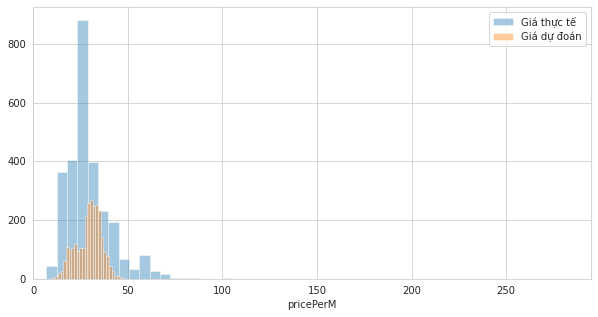

In [201]:
lr = LinearRegression()
Predictive_Model(lr)

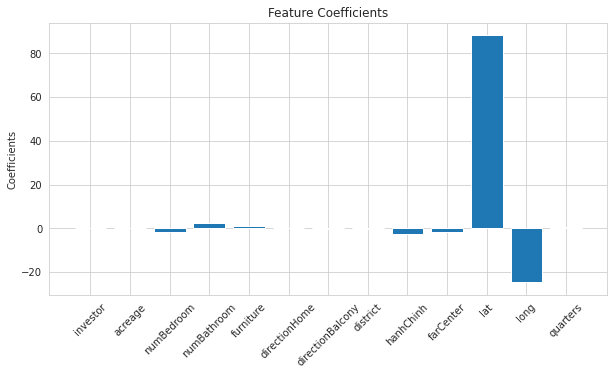

In [202]:
FeatureBar(lr.coef_, 'Feature Coefficients', 'Coefficients')

In [203]:
lr.coef_

array([ 1.90109470e-03,  4.49438353e-02, -1.68537066e+00,  2.60836449e+00,
        9.38210486e-01,  2.54986190e-01, -2.13778141e-01, -1.67776494e-01,
       -2.60624685e+00, -1.90301065e+00,  8.82648306e+01, -2.47107982e+01,
        4.73549021e-01])

**Ridge Regression**

In [204]:
from sklearn.linear_model import Ridge


R_squared: 0.2375644831424073
Square Root of MSE: 11.369227253615913


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



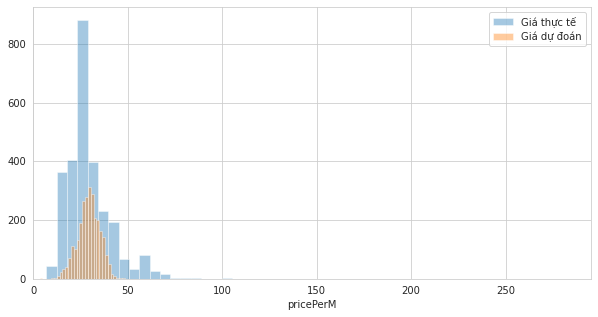

In [205]:
rr = Ridge(alpha=100)
Predictive_Model(rr)

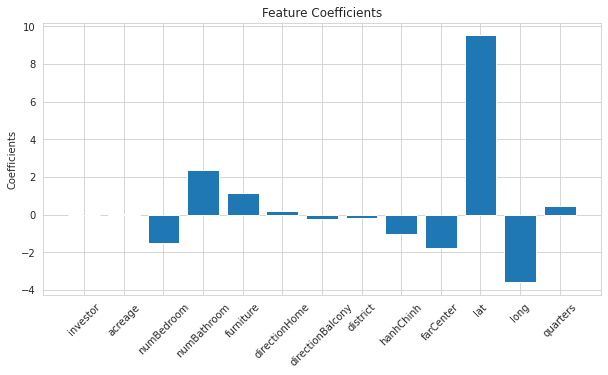

In [206]:
FeatureBar(rr.coef_, 'Feature Coefficients', 'Coefficients')


**K-Nearest Neighbors**

In [207]:
from sklearn.neighbors import KNeighborsRegressor


R_squared: 0.5617916493197455
Square Root of MSE: 8.619254666075644


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



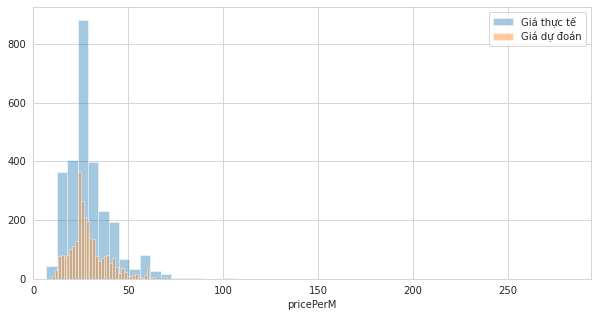

In [212]:
knn = KNeighborsRegressor(n_neighbors=5)
Predictive_Model(knn)

**Decision Tree**

In [213]:
from sklearn.tree import DecisionTreeRegressor

R_squared: 0.6555139891091077
Square Root of MSE: 7.642143408817976


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



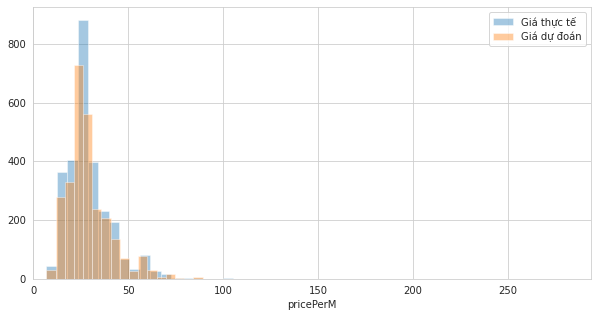

In [219]:
dt = DecisionTreeRegressor(max_depth=45, random_state=0)
Predictive_Model(dt)

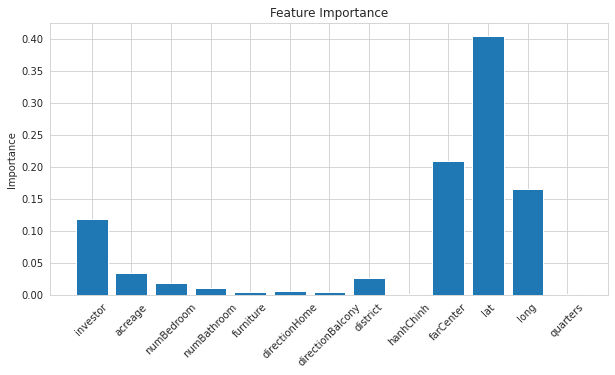

In [220]:
FeatureBar(dt.feature_importances_, 'Feature Importance', 'Importance')

In [221]:
from sklearn.ensemble import RandomForestRegressor

R_squared: 0.872653752550498
Square Root of MSE: 4.646462794083645


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



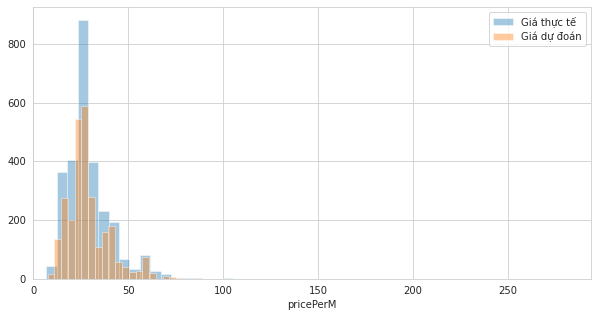

In [222]:
rfr = RandomForestRegressor()
Predictive_Model(rfr)

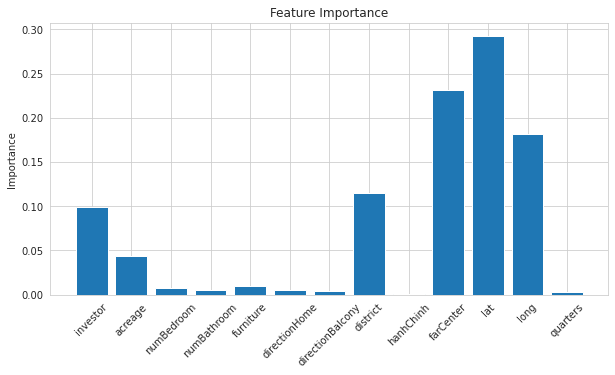

In [223]:
FeatureBar(rfr.feature_importances_, 'Feature Importance', 'Importance')

**Performance Summary**

In [224]:
regressor = ['Linear Regression', 'Ridge Regression', 'KNN', 'Decision Tree', 'RandomForest']
models = [LinearRegression(), Ridge(alpha=100), KNeighborsRegressor(n_neighbors=5), DecisionTreeRegressor(max_depth=45, random_state=0), RandomForestRegressor()]
R_squared = []
RMSE = []
for m in models:
    m.fit(train_X, train_y)
    prediction_m = m.predict(test_X)
    r2 = metrics.r2_score(test_y, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(test_y, prediction_m))
    R_squared.append(r2)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'RMSE':RMSE}, index=regressor)
basic_result

,R squared,RMSE
Linear Regression,0.289681,10.973775
Ridge Regression,0.237564,11.369227
KNN,0.561792,8.619255
Decision Tree,0.655514,7.642143
RandomForest,0.872939,4.641249


#**Cross Validation and Grid Search**

**Linear Regression**

In [225]:
scoring={'R_squared':'r2', 'Square Root of MSE': 'neg_mean_squared_error'}

In [226]:
def CrossVal(estimator):
    scores = cross_validate(estimator, X, y, cv=10, scoring=scoring)
    r2 = scores['test_R_squared'].mean()
    mse = abs(scores['test_Square Root of MSE'].mean())
    print('R_squared:', r2)
    print('Square Root of MSE:', np.sqrt(mse))

In [227]:
CrossVal(LinearRegression())

R_squared: 0.2994483950235933
Square Root of MSE: 10.505115847640552


**Ridge Regression**

In [228]:
from sklearn.model_selection import GridSearchCV

In [229]:
def GridSearch(estimator, Features, Target, param_grid):
    for key, value in scoring.items():
        grid = GridSearchCV(estimator, param_grid, cv=10, scoring=value)
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()

In [230]:
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}

GridSearch(Ridge(), X, y, param_grid)

R_squared
The Best Parameter: {'alpha': 0.01}
The Score: 0.2994481940532479

Square Root of MSE
The Best Parameter: {'alpha': 0.01}
The Score: 10.505113568517716



**K-Nearest Neighbors**

In [231]:
param_grid = dict(n_neighbors=np.arange(5,26))

GridSearch(KNeighborsRegressor(), X, y, param_grid)

R_squared
The Best Parameter: {'n_neighbors': 5}
The Score: 0.6295437975524919

Square Root of MSE
The Best Parameter: {'n_neighbors': 5}
The Score: 7.71937769612643



In [232]:
from sklearn.model_selection import validation_curve

In [233]:
def ValidationCurve(estimator, Features, Target, param_name, Name_of_HyperParameter, param_range):
    
    train_score, test_score = validation_curve(estimator, Features, Target, param_name, param_range,cv=10,scoring='r2')
    Rsqaured_train = train_score.mean(axis=1)
    Rsquared_test= test_score.mean(axis=1)
    
    plt.figure(figsize=(10,5))
    plt.plot(param_range, Rsqaured_train, color='r', linestyle='-', marker='o', label='Training Set')
    plt.plot(param_range, Rsquared_test, color='b', linestyle='-', marker='x', label='Testing Set')
    plt.legend(labels=['Training Set', 'Testing Set'])
    plt.xlabel(Name_of_HyperParameter)
    plt.ylabel('R_squared')

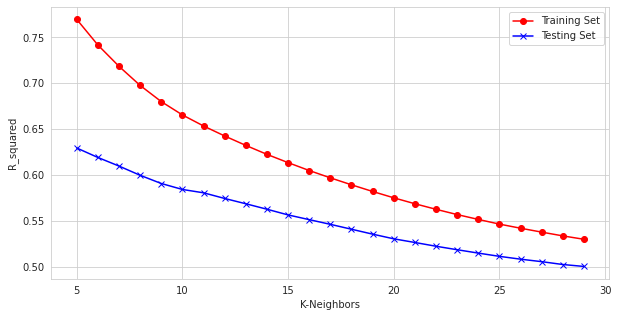

In [235]:
ValidationCurve(KNeighborsRegressor(), X, y, 'n_neighbors', 'K-Neighbors',np.arange(5,30))

**Decision Tree**

In [236]:
param_grid=dict(max_depth=np.arange(4,15))

GridSearch(DecisionTreeRegressor(random_state=0), X, y, param_grid)

R_squared
The Best Parameter: {'max_depth': 14}
The Score: 0.8624281105946178

Square Root of MSE
The Best Parameter: {'max_depth': 14}
The Score: 4.582999775849823



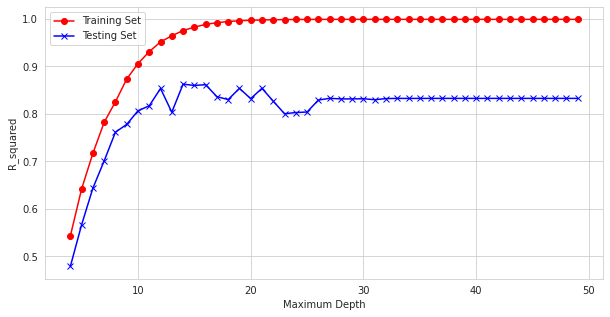

In [237]:
ValidationCurve(DecisionTreeRegressor(random_state=0), X, y, 'max_depth', 'Maximum Depth', np.arange(4,50))

**Random Forest**

In [250]:
param_grid = {
    'max_depth': [100, 110],
    'n_estimators': [200, 300]
}

In [251]:
GridSearch(RandomForestRegressor(),X,y,param_grid)

R_squared
The Best Parameter: {'max_depth': 100, 'n_estimators': 300}
The Score: 0.896426264466806

Square Root of MSE
The Best Parameter: {'max_depth': 100, 'n_estimators': 300}
The Score: 4.041270091114175



**Cross Validation Summary**

In [254]:
lr_scores = cross_validate(LinearRegression(), X, y, cv=10, scoring='r2')
rr_scores = cross_validate(Ridge(alpha=10), X, y, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=5), X, y, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=14, random_state=0), X, y, cv=10, scoring='r2')
rfr_scores = cross_validate(RandomForestRegressor(), X, y, cv =10, scoring='r2')
lr_test_score = lr_scores.get('test_score')
rr_test_score = rr_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')
rfr_test_score = rfr_scores.get('test_score')
box= pd.DataFrame({'Linear Regression':lr_test_score, 'Ridge Regression':rr_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score,'Random Forest':rfr_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Linear Regression,Ridge Regression,K-Nearest Neighbors,Decision Tree,Random Forest
1,0.257361,0.253202,0.568733,0.758333,0.819645
2,0.308520,0.297631,0.537617,0.899109,0.921635
3,0.346555,0.325357,0.715309,0.928980,0.946505
4,0.251758,0.242929,0.495418,0.899699,0.879950
5,0.290023,0.280865,0.625578,0.890452,0.922758
6,0.342902,0.329807,0.689021,0.922285,0.932074
7,0.228201,0.225305,0.586635,0.929105,0.923792
8,0.274747,0.265779,0.686753,0.693198,0.715495
9,0.376391,0.360997,0.736554,0.923331,0.958492
10,0.318025,0.300491,0.653821,0.779788,0.920622


Text(0.5, 0, 'K-th Fold')

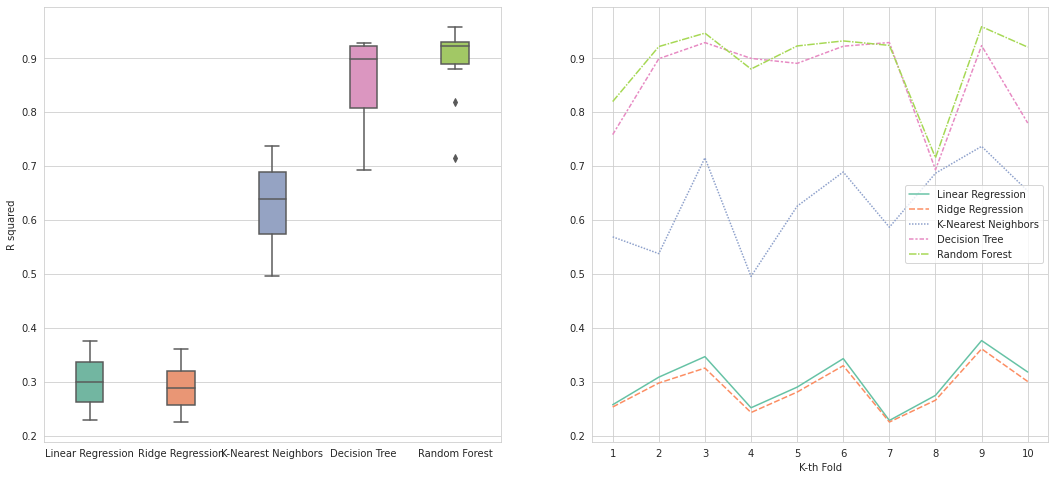

In [256]:
f,ax=plt.subplots(1,2, figsize=(18,8))

sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')

sns.lineplot(data=box.drop(box.tail(1).index), palette="Set2", ax=ax[1])
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')